<a href="https://colab.research.google.com/github/oualid-oz/image-compression-with-psnr/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install contrast_image

In [ ]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 
import time 
from contrast_image import quantitation
from skimage import io

from PIL import Image

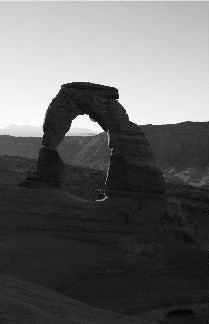

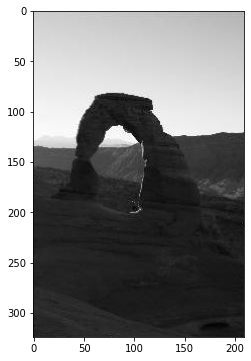

In [ ]:
img = Image.open('/content/drive/MyDrive/img_6847.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);


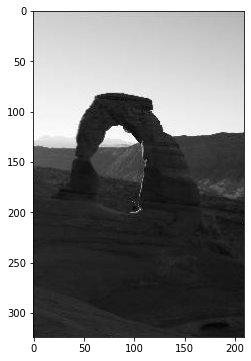

In [ ]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

In [ ]:
U, sigma, V = np.linalg.svd(imgmat)

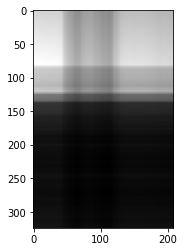

In [ ]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray');

In [ ]:
from math import log10, sqrt
import cv2

In [ ]:
def calculate_psnr(img1, img2, max_value=255):
    """"Calculating peak signal-to-noise ratio (PSNR) between two images."""
    mse = np.mean((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32)) ** 2)
    if mse == 0:
        return 100
    return 20 * np.log10(max_value / (np.sqrt(mse)))


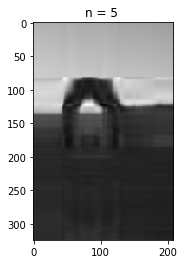

PSNR = 27.035958388465406


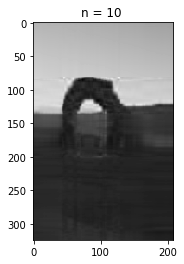

PSNR = 30.184944531856488


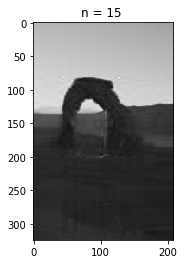

PSNR = 32.10997438895972


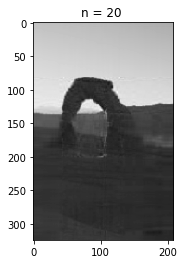

PSNR = 33.65650871066664


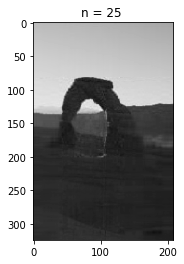

PSNR = 35.06628274273159


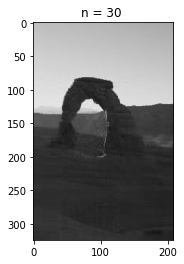

PSNR = 36.31109535591924


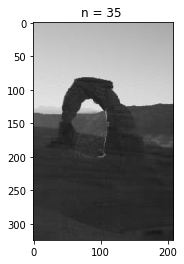

PSNR = 37.47163817138501


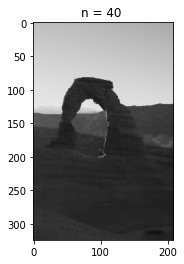

PSNR = 38.52773795454152


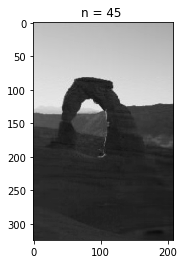

PSNR = 39.564376870101434


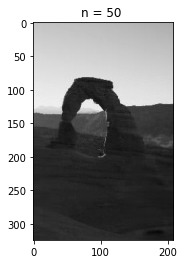

PSNR = 40.58568171434938


In [ ]:

for i in range(5, 51, 5):
  reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
  plt.imshow(reconstimg, cmap='gray')
  title = "n = %s " % i
  plt.title(title)
  plt.show()
  print("PSNR = %s" %  calculate_psnr(imgmat, reconstimg))
